## Business Objective: 

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.


## Project Goal:
Predict future medical expenses using individual features like age, BMI, smoker status, etc., to support insurance premium decisions.

In [5]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Load the dataset
df=pd.read_csv('insurance.csv')

In [7]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


#### The dataset has been successfully loaded and includes the following columns:

age: Age of the individual

sex: Gender (male/female)

bmi: Body Mass Index

children: Number of children/dependents

smoker: Smoking status (yes/no)

region: Residential region (northeast, northwest, southeast, southwest)

expenses: Annual medical expenses (target variable)

In [9]:
df.shape

(1338, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
# Check for missing values 

print("\nMissing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [13]:
# Missing Values: None found — no action needed.

In [14]:
# Identify and remove duplicate rows

print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")


Number of duplicate rows: 1
Data shape after removing duplicates: (1337, 7)


#### Outlier detection and removal using IQR method

We can see extreme values in BMI & expenses column but choosing not to remove outliers because of below reasons:

For BMI:
We are building a predictive model that must account for all health risk levels, including obesity.
Outliers might represent real risk factors relevant for insurance.

For expenses:
Since high costs are often meaningful cases (e.g., smokers with chronic disease), removing them can cause the model to under-predict risk.
In insurance, extreme values are important — they often drive premium pricing decisions.




In [16]:
# Identify categorical columns

categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Print them
print("Categorical columns:")
print(categorical_cols)



Categorical columns:
['sex', 'smoker', 'region']


In [17]:
# Copy original dataset
df_encoded = df.copy()

# One-Hot Encode Categorical Variables (drop first to avoid dummy variable trap)
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# Convert any boolean (True/False) columns to integer (1/0)
df_encoded = df_encoded.astype(int, errors='ignore')  # Safe conversion

# Apply Log Transformation to 'expenses'
df_encoded['log_expenses'] = np.log(df_encoded['expenses'])

# Preview updated data
print(df_encoded.head())


   age  bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
0   19   27         0     16884         0           1                 0   
1   18   33         1      1725         1           0                 0   
2   28   33         3      4449         1           0                 0   
3   33   22         0     21984         1           0                 1   
4   32   28         0      3866         1           0                 1   

   region_southeast  region_southwest  log_expenses  
0                 0                 1      9.734122  
1                 1                 0      7.452982  
2                 1                 0      8.400435  
3                 0                 0      9.998070  
4                 0                 0      8.259976  


# EDA

### Distribution of Medical Expenses

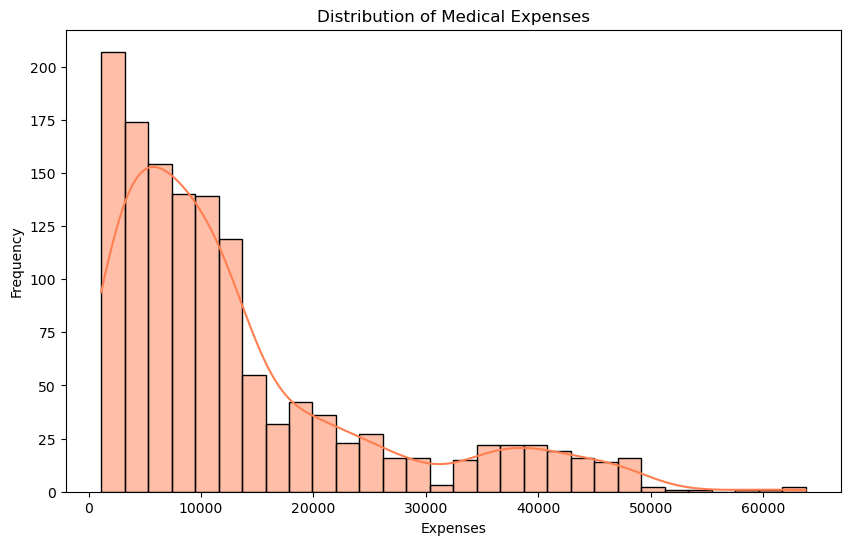

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['expenses'], kde=True, bins=30, color='coral')
plt.title('Distribution of Medical Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()


Right-skewed distribution: Most people have moderate expenses, but a few have very high costs.

Extreme costs likely tied to factors like smoking or age.

### Boxplot: Expenses vs Smoker

C:\Users\JyRa\AppData\Local\Temp\ipykernel_9928\462539967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='expenses', data=df, palette='Set2')


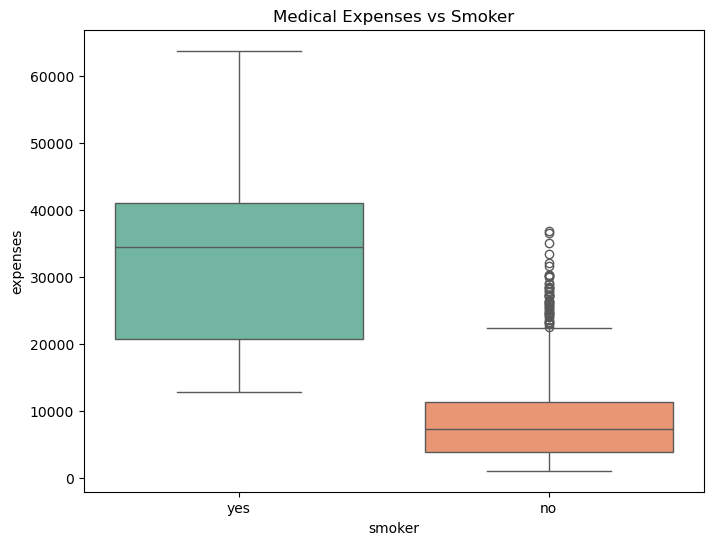

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=df, palette='Set2')
plt.title('Medical Expenses vs Smoker')
plt.show()


Smokers have significantly higher expenses compared to non-smokers.

Clear distinction with some smoker costs going over $60,000.

### Boxplot: Expenses vs Sex

C:\Users\JyRa\AppData\Local\Temp\ipykernel_9928\2157644268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='expenses', data=df, palette='Set3')


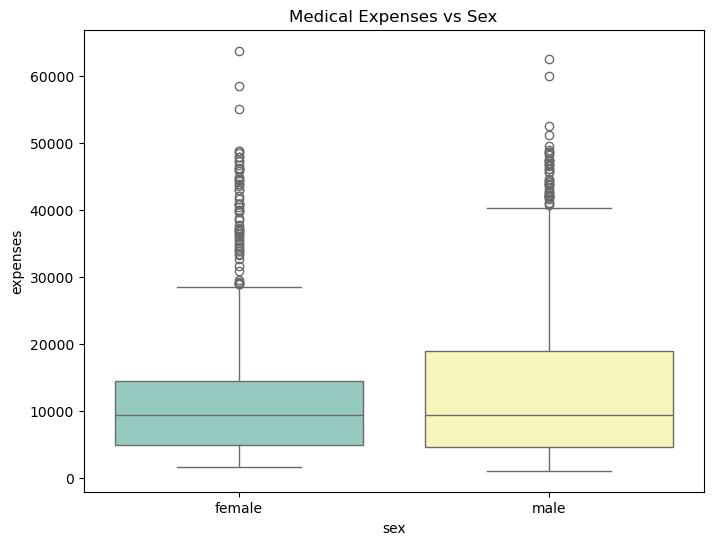

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='expenses', data=df, palette='Set3')
plt.title('Medical Expenses vs Sex')
plt.show();


No significant difference in expenses between male and female.

### Boxplot: Expenses vs Region

C:\Users\JyRa\AppData\Local\Temp\ipykernel_9928\2121932907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='expenses', data=df, palette='pastel')


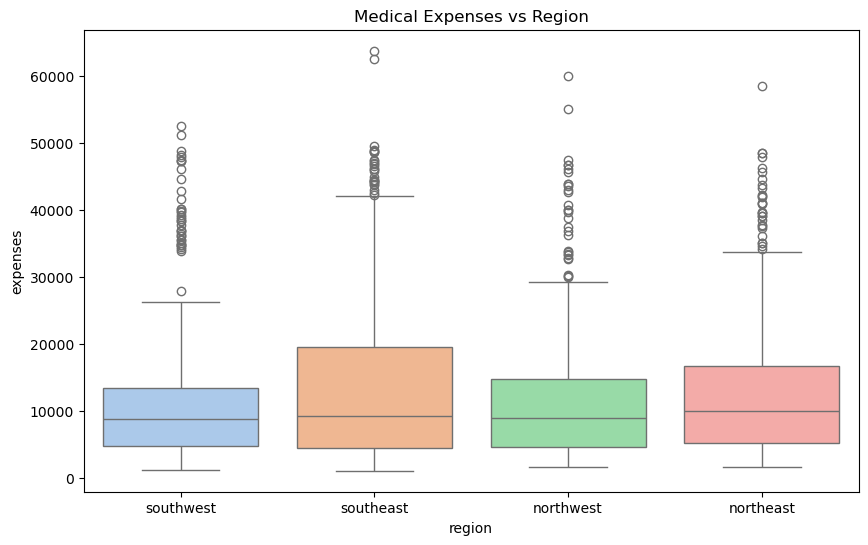

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=df, palette='pastel')
plt.title('Medical Expenses vs Region')
plt.show()


Minor differences between regions, suggesting region has limited influence.

### Scatter Plot: Age vs Expenses (colored by smoker)

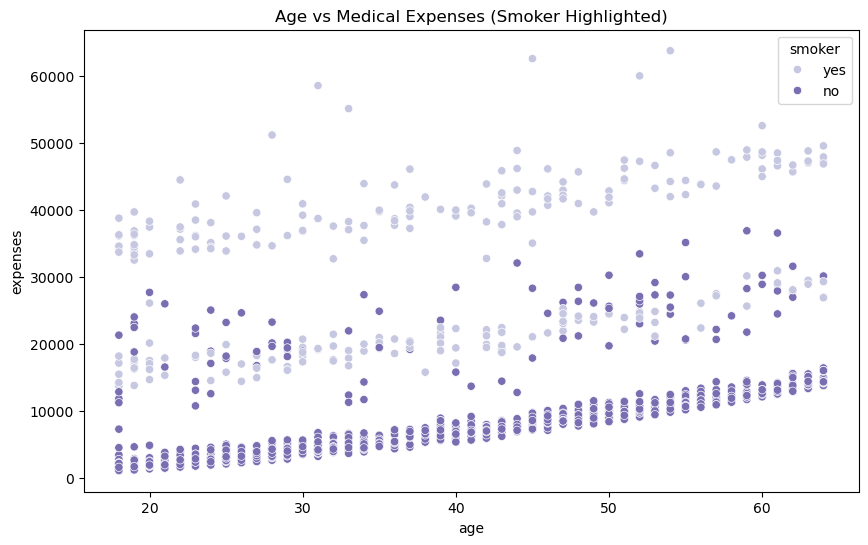

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df, palette='Purples')
plt.title('Age vs Medical Expenses (Smoker Highlighted)')
plt.show()


Older smokers generally have much higher costs.

Non-smokers' expenses rise with age, but not as drastically.

### Correlation Heatmap

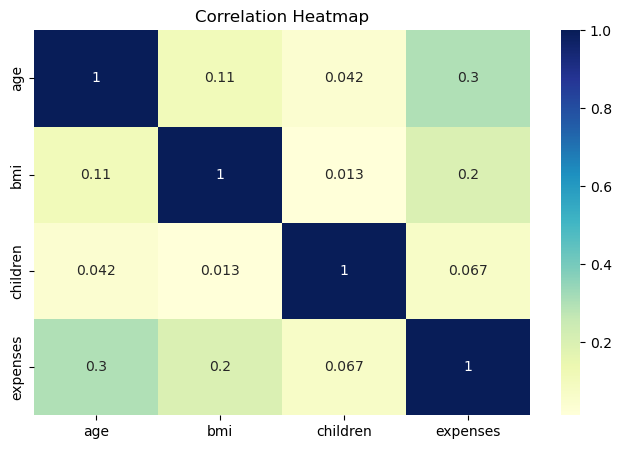

In [35]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['age', 'bmi', 'children', 'expenses']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


Age has the strongest linear correlation with expenses, followed by BMI.

C:\Users\JyRa\AppData\Local\Temp\ipykernel_9928\2358891671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\JyRa\AppData\Local\Temp\ipykernel_9928\2358891671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\JyRa\AppData\Local\Temp\ipykernel_9928\2358891671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


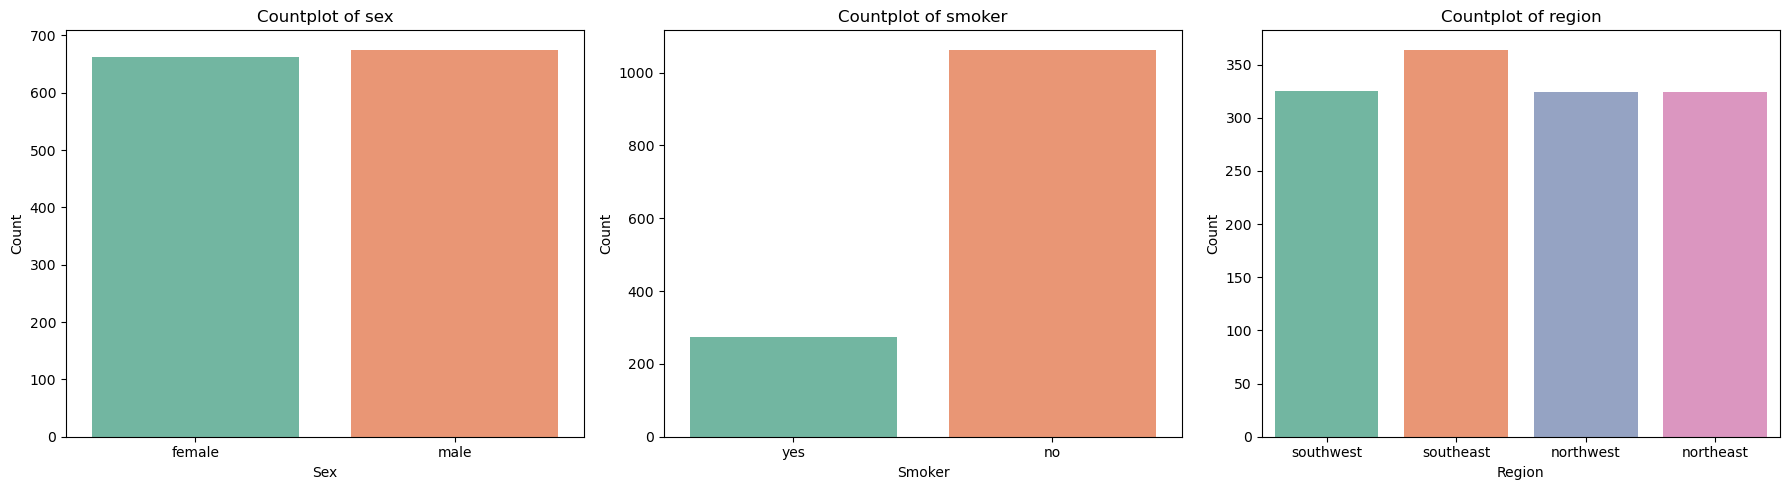

In [37]:
# Plot countplots
plt.figure(figsize=(18, 5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Categorical Columns Distribution:

Sex:

Nearly equal distribution between males and females.

Smoker:

Majority are non-smokers (80%), but smokers are present in significant numbers (20%).

Region:

Fairly balanced distribution across all four regions (Southeast, Southwest, Northwest, Northeast).

